## 0. Setup

### Environment

In [1]:
python_material_folder_name = "DSIF-course-material/python-material"

In [2]:
# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing
        # the following in a new cell:
        # !pwd
    IN_COLAB = True
except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up
    # (assuming you are using the folder structure shared at
    # the beginning of the course)
    path_python_material = ".."

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# some stats
# from scipy import stats
from scipy.stats import skew, kurtosis, shapiro
import math

# some plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# additional modules for data processing
from sklearn.preprocessing import MinMaxScaler

### Load data

In [6]:
# Read data that was exported from previous session
filename = f"lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv"
df = pd.read_csv(f"{path_python_material}/data/1-raw/{filename}")
df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

## 1. Exploratory Data Analysis

In [7]:
# Let's get idea about the data structure and basic statistics

df.dtypes
df.describe()

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,99898.000000,100000.00000,100000.000000,100000.000000,100000.000000,47186.000000,14630.000000,100000.000000,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99994.000000,24602.000000,100000.0,7.166000e+03,7166.000000,100000.000000,97562.000000,9.756200e+04,70356.000000,70356.000000,70356.000000,70356.000000,68227.000000,70356.000000,60315.000000,70356.000000,70356.000000,70356.000000,70343.000000,9.756200e+04,70356.000000,70356.000000,70356.000000,98222.000000,97560.000000,97152.000000,97101.000000,99994.00000,100000.000000,94627.000000,97562.000000,97562.000000,97562.000000,98222.000000,97212.000000,21943.000000,87190.000000,31658.000000,97562.000000,97562.000000,97562.000000,97949.000000,97562.000000,97562.000000,97562.000000,97562.000000,97562.000000,97949.000000,94488.000000,97562.000000,97562.000000,97562.000000,97558.000000,97133.000000,99955.000000,99995.000000,9.756200e+04,9.822200e+04,98222.000000,9.756200e+04,6739.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6613.000000,6740.000000,6740.000000,6740.000000,6740.000000,4895.000000,6222.000000,4895.000000,4895.000000,6127.000000,6222.000000,6222.000000
mean,1.462098e+06,86737.789590,9.789485e+07,15332.373000,15328.216250,15313.244829,451.708510,8.002918e+04,19.332252,0.28473,700.639200,704.639440,0.554310,35.034269,74.945113,11.688690,0.17770,1.689349e+04,24.040390,4032.024853,4031.436341,12559.494957,12544.530188,9911.414064,2479.307829,1.750509,167.022522,28.605125,3512.909843,690.476220,677.660400,0.017651,44.633322,1.0,1.295764e+05,19.408330,0.003460,208.056907,1.459264e+05,0.928037,2.839175,0.703906,1.616351,20.323259,36927.159276,68.988842,1.250881,2.645076,5999.964339,56.154116,3.639794e+04,1.075232,1.517497,1.998707,4.512166,13757.234143,12779.260859,55.838138,0.00821,10.706750,125.750589,179.950237,14.462444,8.325342,1.507839,25.101726,39.344392,7.094151,36.186525,0.483631,3.702671,5.594074,4.858508,7.635350,8.558486,8.266138

### 1.1 Numerical features

In [8]:
# To get a better overview of the data nature, we will plot distribution of the
# numeric features, before proceeding with further data cleaning and processing

def plot_single_box(df, column_name):
    """
    Generates a boxplot for a single specified column in the dataframe.
    The data is normalized to a range of -1 to 1 for better visualization.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column_name: The column to visualize.

    Returns:
    - None
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    # Drop NaN values for the selected column
    data = df[column_name].dropna()

    # Normalize the data to range [-1, 1]
    scaler = MinMaxScaler(feature_range=(-1, 1))
    normalized_data = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()

    # Plot the boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=normalized_data)
    plt.title(f"Boxplot of {column_name} (Normalized)")
    plt.xlabel("Normalized Values")
    plt.show()

def plot_box_all_numeric(df, max_features_per_plot=10):
    """
    Generates boxplots for all numeric columns in the dataframe, divided into subplots.
    Each subplot contains a maximum of `max_features_per_plot` features.
    Each feature is normalized independently to a range of -1 to 1.

    Parameters:
    - df: pandas DataFrame containing the data.
    - max_features_per_plot: Maximum number of features to display per subplot.

    Returns:
    - None
    """
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns

    if numeric_cols.empty:
        raise ValueError("No numeric columns found in the DataFrame.")

    # Normalize each numeric column independently
    normalized_df = pd.DataFrame(index=df.index)  # Preserve original index
    scaler = MinMaxScaler(feature_range=(-1, 1))

    for col in numeric_cols:
        col_data = df[col]
        if col_data.isnull().any():
            # Fill NaN values with the column mean before normalization
            col_data = col_data.fillna(col_data.mean())

        normalized_df[col] = scaler.fit_transform(col_data.values.reshape(-1, 1)).flatten()

    # Determine the number of subplots needed
    num_features = len(numeric_cols)
    num_subplots = math.ceil(num_features / max_features_per_plot)

    # Create subplots
    fig, axes = plt.subplots(num_subplots, 1, figsize=(16, 6 * num_subplots), constrained_layout=True)

    if num_subplots == 1:
        axes = [axes]  # Ensure axes is iterable for a single subplot

    for i in range(num_subplots):
        start_idx = i * max_features_per_plot
        end_idx = min(start_idx + max_features_per_plot, num_features)
        subset_cols = numeric_cols[start_idx:end_idx]

        sns.boxplot(data=normalized_df[subset_cols], orient="h", ax=axes[i])
        axes[i].set_title(f"Boxplot of Features {start_idx + 1} to {end_idx} (Normalized)")
        axes[i].set_xlabel("Normalized Values")
        axes[i].set_ylabel("Features")

    plt.show()

<ipython-input-8-3bf0a529d9fe>:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized_df[col] = scaler.fit_transform(col_data.values.reshape(-1, 1)).flatten()
<ipython-input-8-3bf0a529d9fe>:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized_df[col] = scaler.fit_transform(col_data.values.reshape(-1, 1)).flatten()
<ipython-input-8-3bf0a529d9fe>:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

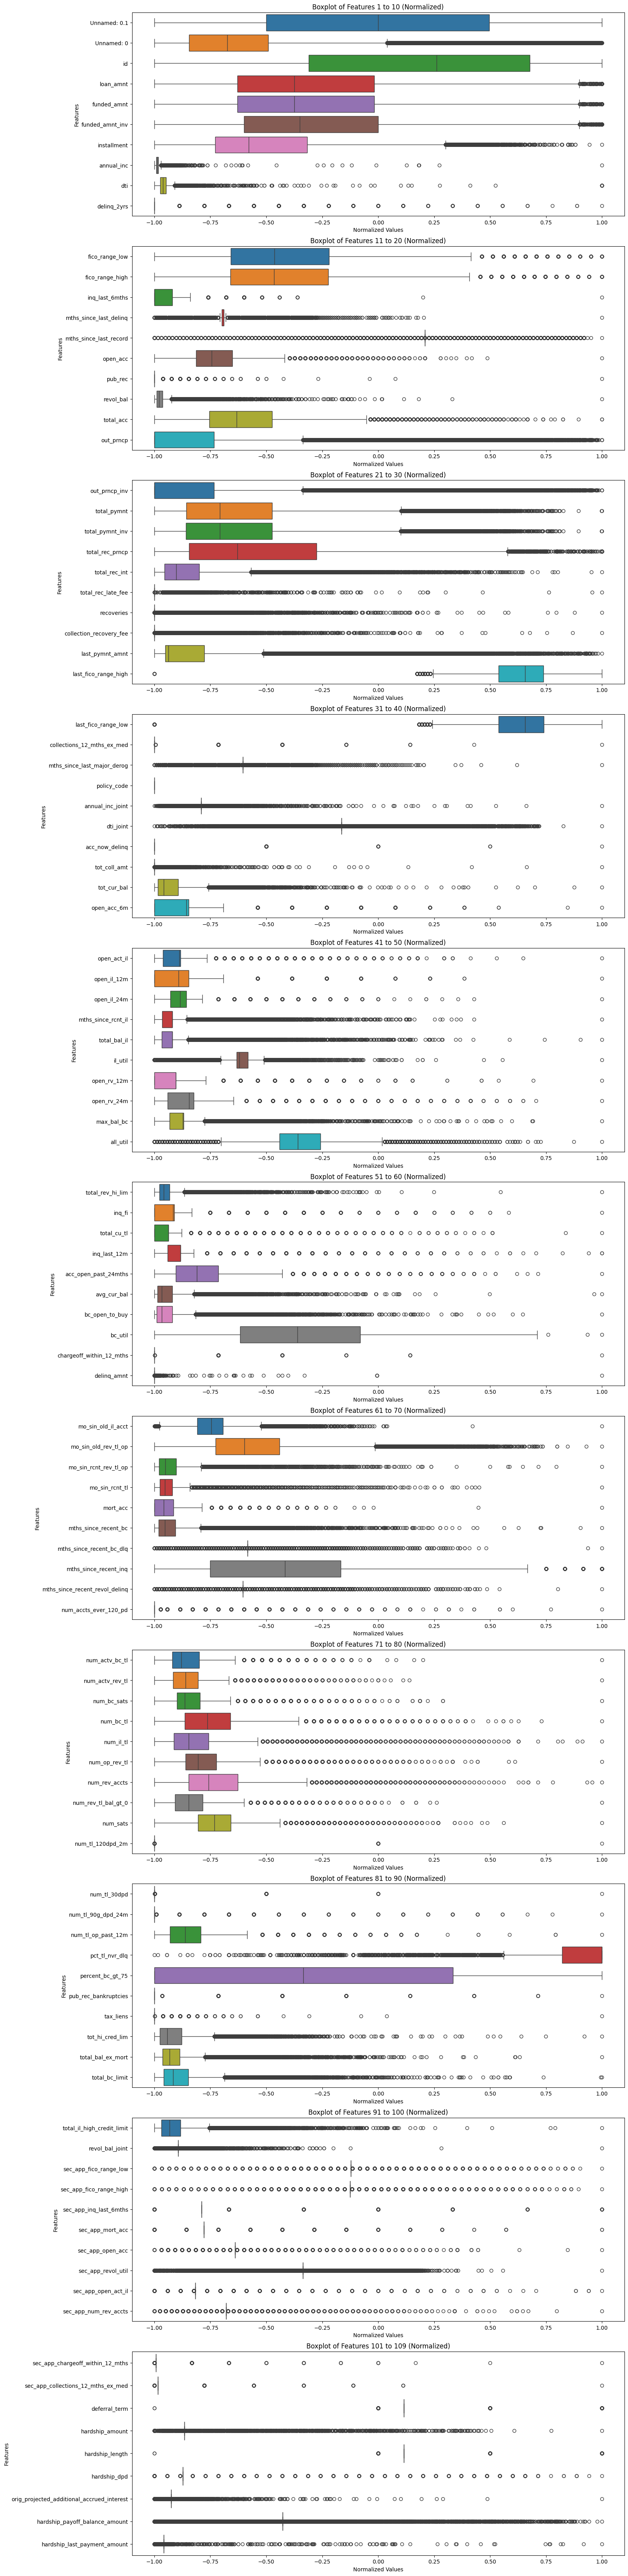

In [9]:
plot_box_all_numeric(df)

In [10]:
# Let's remove the outliers and plot the data again

def remove_outliers(column, z_score=3.0):
    """
    Returns a boolean mask for rows within the Z-score threshold for a specific column.
    """
    # Calculate the Z-scores
    mean = column.mean()
    std = column.std()
    z_scores = (column - mean) / std

    # Return a boolean mask for rows within the Z-score threshold
    return np.abs(z_scores) <= z_score


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
<ipython-input-8-3bf0a529d9fe>:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized_df[col] = scaler.fit_transform(col_data.values.reshape(-1, 1)).flatten()
<ipython-input-8-3bf0a529d9fe>:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

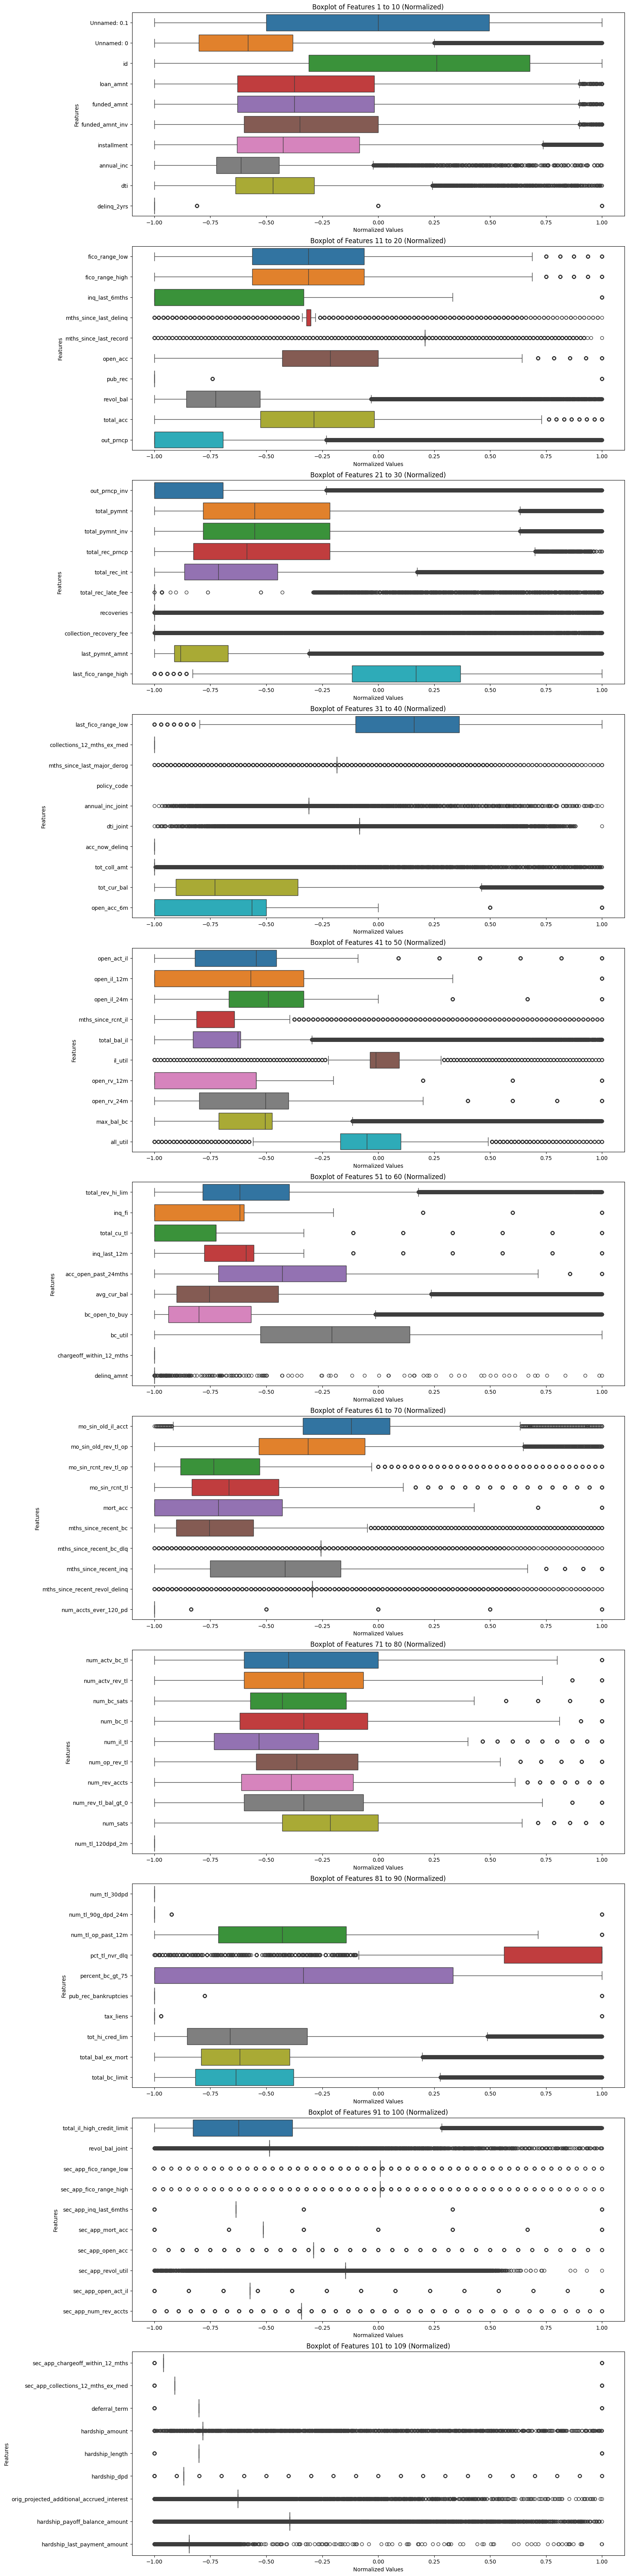

In [11]:
# Apply the outlier filter to all numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
mask = df[numeric_cols].apply(lambda x: remove_outliers(df[x.name], 3.0))

# Combine the masks to filter rows where all numeric columns are within the Z-score threshold
df_no_outliers = df[mask]

# Plot the new dataset
plot_box_all_numeric(df_no_outliers)

In [12]:
# Let now work on filtering the data based on the Skewness and Kurtois numbers
# Default paramters will be set

def filter_normal_features(df, skew_thresh=0.75, kurt_thresh=2.0, use_shapiro=False):
    """
    Filters columns from a DataFrame that resemble a normal distribution
    based on skewness, kurtosis, and optionally the Shapiro-Wilk test.

    Parameters:
        df (pd.DataFrame): Input DataFrame (assumes normalized).
        skew_thresh (float): Max absolute skewness allowed.
        kurt_thresh (float): Max deviation from kurtosis=3 allowed.
        use_shapiro (bool): Whether to include the Shapiro-Wilk test.

    Returns:
        List[str]: Columns likely to be normally distributed.
    """
    normal_cols = []
    for col in df.columns:
        data = df[col].dropna()
        col_skew = skew(data)
        col_kurt = kurtosis(data, fisher=False)  # Pearson's definition: normal = 3

        if abs(col_skew) <= skew_thresh and abs(col_kurt - 3) <= kurt_thresh:
            if use_shapiro:
                stat, p = shapiro(data.sample(min(5000, len(data))))  # shapiro is slow for large n
                if p > 0.05:  # Fail to reject H0: normality
                    normal_cols.append(col)
            else:
                normal_cols.append(col)

    return normal_cols

 **Why these?**
> Skewness ∈ [-0.75, 0.75] → still fairly symmetric but allows moderate tail.
>
> Kurtosis ∈ [1, 5] → permits some peakiness or flatness but avoids extreme tails.

<ipython-input-12-62611487aabf>:21: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  col_skew = skew(data)
<ipython-input-12-62611487aabf>:22: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  col_kurt = kurtosis(data, fisher=False)  # Pearson's definition: normal = 3


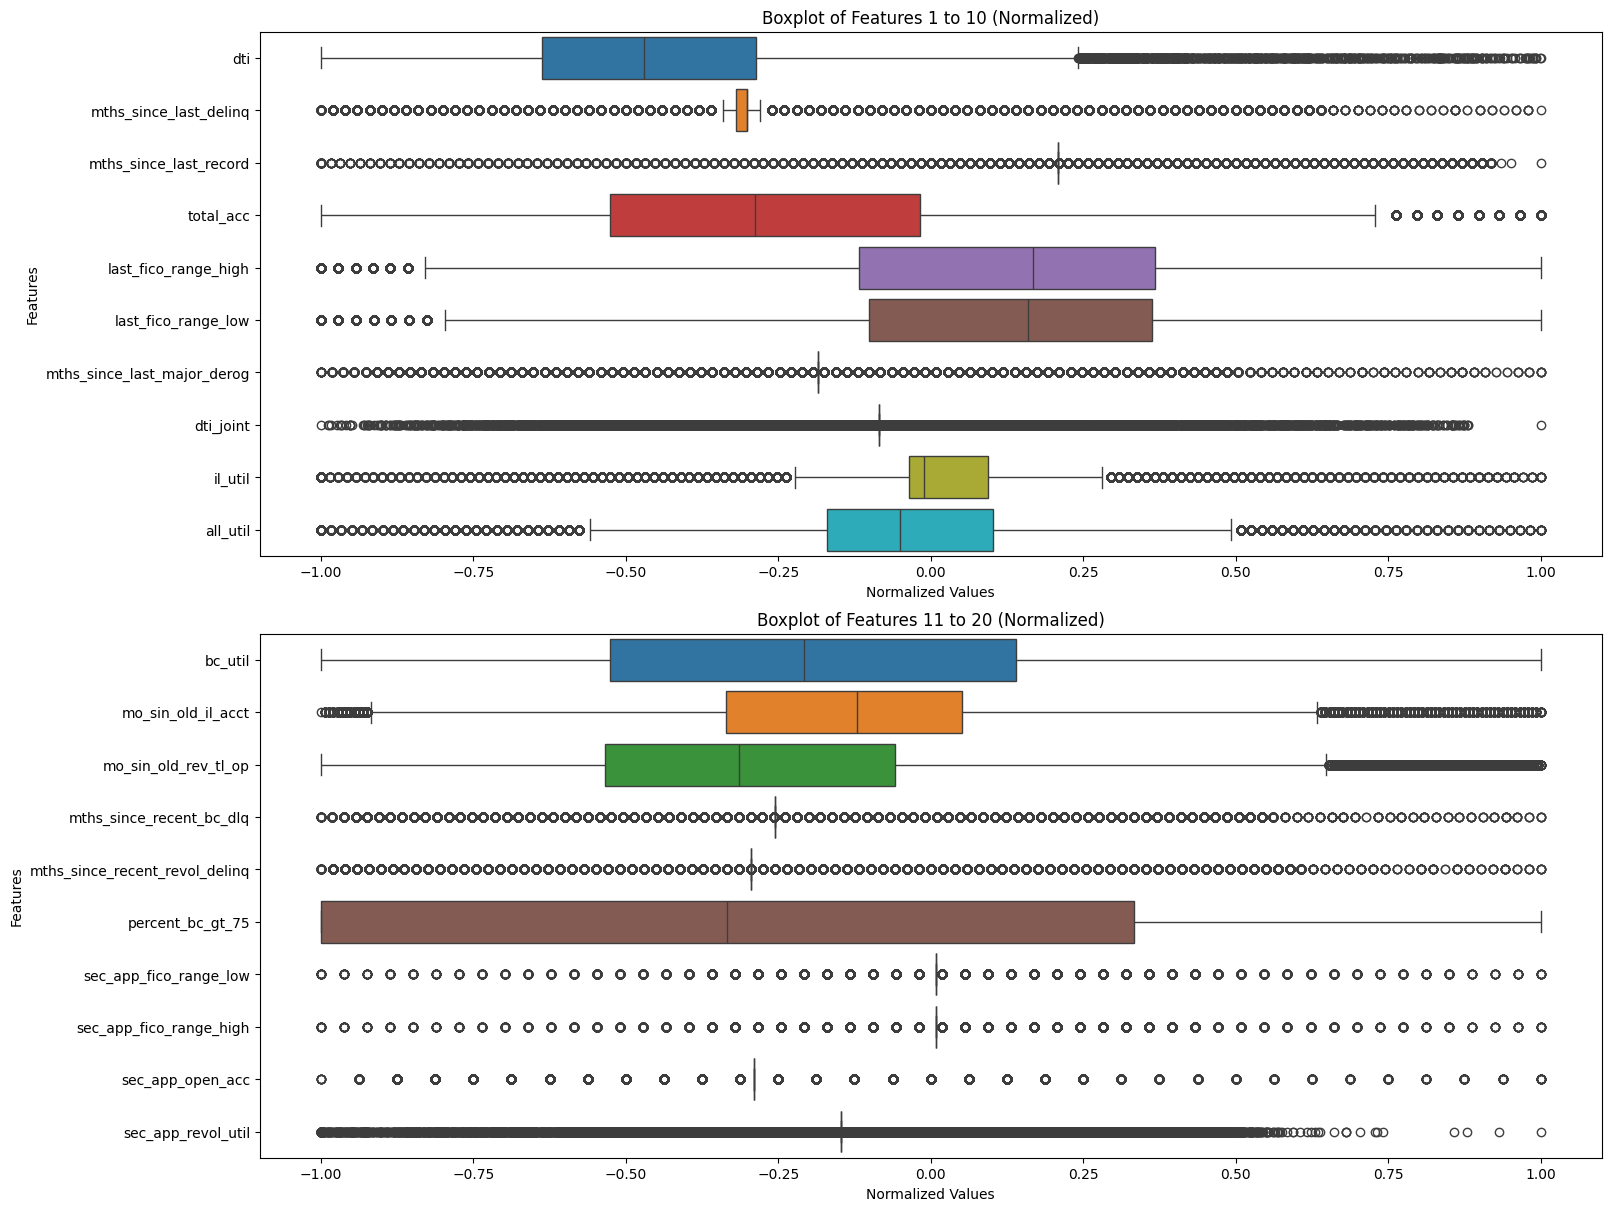

In [13]:
# Plot the new dataset
normal_features = filter_normal_features(df_no_outliers)[2:] # First to indexes are only indexes
plot_box_all_numeric(df_no_outliers[normal_features])

In [14]:
# Let's look now which are these features?
normal_features

['dti',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'total_acc',
 'last_fico_range_high',
 'last_fico_range_low',
 'mths_since_last_major_derog',
 'dti_joint',
 'il_util',
 'all_util',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'percent_bc_gt_75',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_open_acc',
 'sec_app_revol_util']

#### 1.1-a Correlation Matrix

In [15]:
def plot_correlation_matrix(df, features, method='pearson'):
    """
    Plots a heatmap of the correlation matrix for the given features.

    Parameters:
    - df: pandas DataFrame containing the data.
    - features: List of features to include in the correlation matrix.

    Returns:
    - None
    """
    # Compute the correlation matrix
    corr_matrix = df[features].corr(method=method)

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix")
    plt.show()



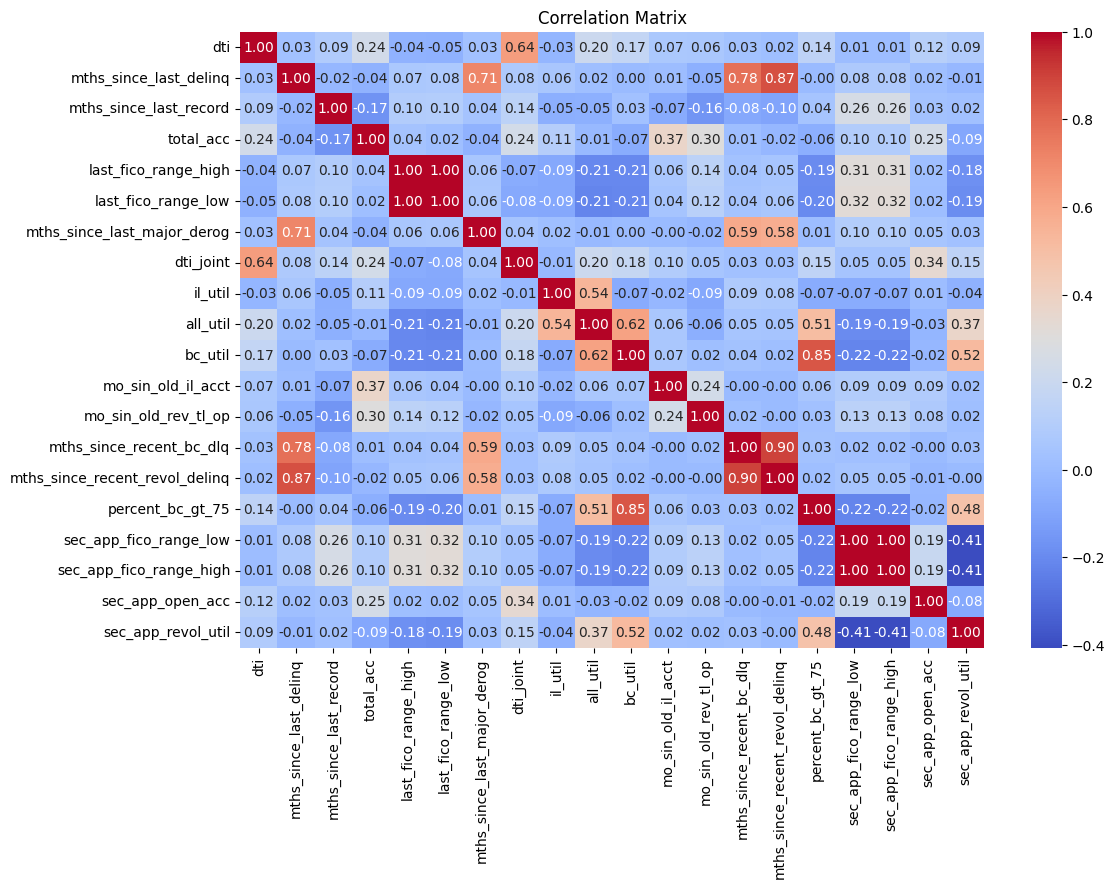

In [16]:
# Pearson's correlation
plot_correlation_matrix(df_no_outliers, normal_features)

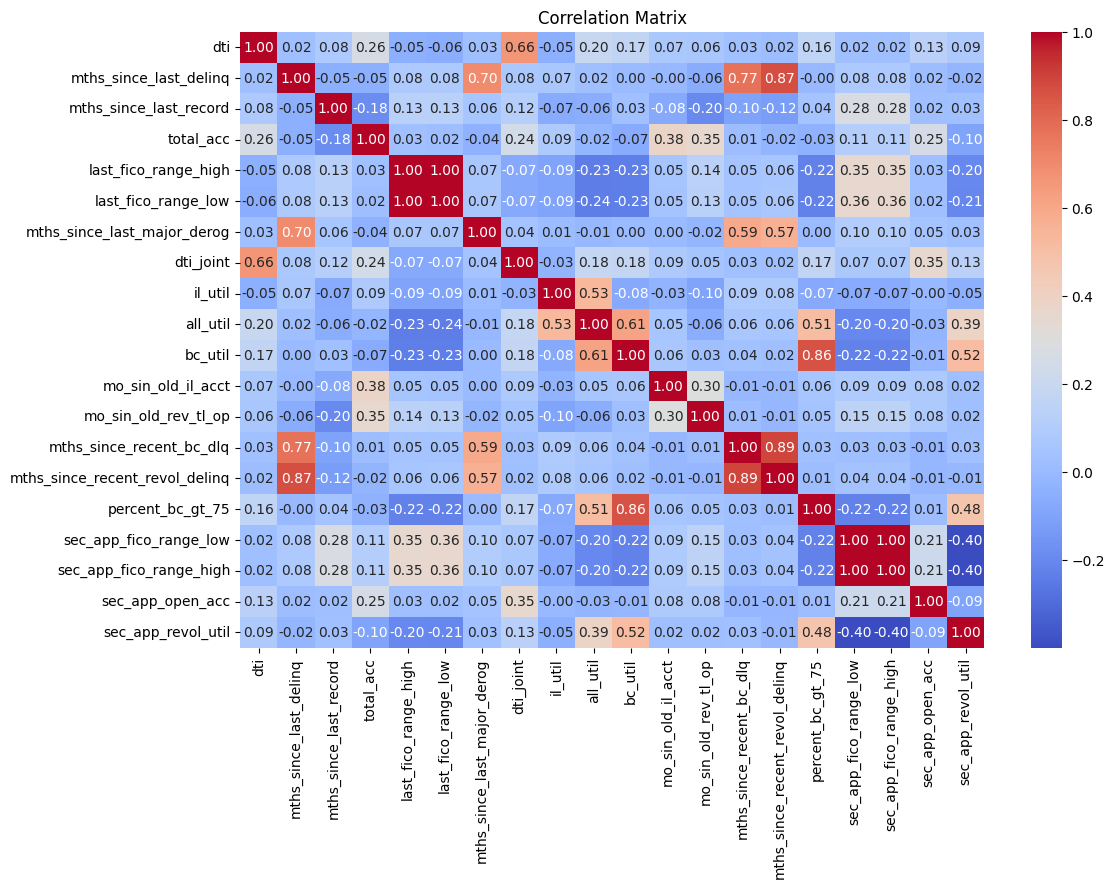

In [17]:
# Spearman's correlation for non-linear trends
plot_correlation_matrix(df_no_outliers, normal_features, method='spearman')

#### 1.1-b Pairplot

In [18]:
def plot_pairplot(df, features, sample_size=1000):
    """
    Plots pairwise relationships between the given features using a pairplot.

    Parameters:
    - df: pandas DataFrame containing the data.
    - features: List of features to include in the pairplot.
    - sample_size: Number of rows to sample for visualization (default is 1000).

    Returns:
    - None
    """
    # Sample the data for faster visualization
    sampled_df = df[features].sample(n=min(sample_size, len(df)), random_state=42)

    # Plot the pairplot
    sns.pairplot(sampled_df)
    plt.show()


In [19]:
# After plotting, you are able to Zoom over the image
plot_pairplot(df_no_outliers, normal_features)

Output hidden; open in https://colab.research.google.com to view.

In [20]:
normal_features

['dti',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'total_acc',
 'last_fico_range_high',
 'last_fico_range_low',
 'mths_since_last_major_derog',
 'dti_joint',
 'il_util',
 'all_util',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'percent_bc_gt_75',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_open_acc',
 'sec_app_revol_util']

From previous Numeric feature analysis, I will take into consideration the following explanation for the feature selection:

### Feature Insights for Fraud Detection

The selected features provide strong signals for identifying fraudulent behavior:

#### 1. **Delinquency & Derogatory History**
- `mths_since_last_delinq`, `mths_since_last_record`, etc.  
- These highlight recent or historical payment issues.

#### 2. **Debt Ratios & Utilization**
- `dti`, `dti_joint`, `bc_util`, `all_util`, `il_util`, etc.  
- Fraudulent profiles may show low debt-to-income (DTI) with high credit usage — a mismatch pointing to data manipulation or overstated income.

#### 3. **FICO Score Ranges**
- `last_fico_range_*`, `sec_app_fico_range_*`  
- Discrepancies between credit scores and actual credit behavior may indicate synthetic identities or falsified information.

#### 4. **Credit Age & Activity**
- `mo_sin_old_*`, `total_acc`, `sec_app_open_acc`  
- Limited or inconsistent credit histories with a large number of accounts can flag potential identity or account fabrication.

#### 5. **High Utilization Risk**
- `percent_bc_gt_75`  
- High percentage of maxed-out cards may reflect financial distress or bust-out fraud attempts.


<br>

> These features combined allow detection of hidden anomalies and suspicious behavioral patterns useful in fraud modeling.


<br>
<br>
<br>

### 1.2 Non-Numeric features Analysis

In [21]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
non_numeric_cols

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'debt_settlement_flag'],
      dtype='object')

#### Feature Engineering: Categorical & Textual Fields

The following features were engineered to prepare for model development with both Random Forest and Deep Learning architectures.

---

##### 1. `emp_length` → `emp_length_num`
**Relevance:** Indicates employment stability and financial reliability.  
**Strategy:** Parsed into numeric scale from 0 (shortest) to 10 (longest), with missing values as -1.

---

##### 2. `term` → `term_months`
**Relevance:** Loan term affects risk profile and repayment behavior.  
**Strategy:** Extracted numeric value (e.g., 36, 60) from text field.

---

##### 3. `emp_title` → `emp_title_clean`, `emp_title_encoded`
**Relevance:** Job titles can indicate fraud patterns or risk clusters (e.g., inconsistent job roles).  
**Strategy:** Grouped top 20 most frequent titles, remaining labeled as "Other". Encoded using LabelEncoder.

---

##### 4. Categorical Fields (e.g., `home_ownership`, `purpose`, `grade`, `verification_status`, `application_type`)
**Relevance:** These reflect lifestyle, financial behavior, and application context — often predictive in credit risk and fraud.  
**Strategy:** Encoded with LabelEncoder for tree-based models. Suitable for OneHot or Embedding layers in neural networks.

---

##### 5. Binary Flags (`hardship_flag`, `debt_settlement_flag`, `pymnt_plan`)
**Relevance:** These flags explicitly indicate financial distress or special repayment conditions — key fraud indicators.  
**Strategy:** Mapped `'y'` to 1 and `'n'` to 0.

---

##### Model Compatibility
| Feature Type        | Strategy           | Model Use               |
|---------------------|--------------------|--------------------------|
| Ordinal (emp_length) | Numeric conversion | Normalize for NN; direct for RF |
| Nominal categories   | Label encoded      | RF; OneHot/Embedding for NN     |
| Free text (emp_title)| Group + encode     | Both                     |
| Flags (yes/no)       | Binary encoded     | Both                     |

This ensures consistency and interpretability across both traditional ML and deep learning pipelines.


In [22]:
from sklearn.preprocessing import LabelEncoder

def label_encode_column(df, col, new_col=None):
    """
    Encodes a categorical column using LabelEncoder.
    """
    if new_col is None:
        new_col = f"{col}_encoded"
    le = LabelEncoder()
    df[new_col] = le.fit_transform(df[col].astype(str))
    return df

In [23]:
def encode_emp_length(df, col='emp_length', new_col='emp_length_num'):
    """
    Encodes employment length into a numeric scale from 0 to 10.
    Missing values are encoded as -1.
    """
    def transform(x):
        if pd.isnull(x):
            return -1
        if '<' in x:
            return 0
        if '+' in x:
            return 10
        try:
            return int(x.strip().split()[0])
        except:
            return -1
    df[new_col] = df[col].apply(transform)
    return df

def clean_emp_title(df, col='emp_title', top_n=20, new_col='emp_title_clean'):
    """
    Groups the top N most frequent job titles and labels the rest as 'Other'.
    Encodes the cleaned titles using LabelEncoder.
    """
    top_titles = df[col].value_counts().nlargest(top_n).index
    df[new_col] = df[col].apply(lambda x: x if x in top_titles else 'Other')
    return label_encode_column(df, new_col)

def extract_term_months(df, col='term', new_col='term_months'):
    """
    Extracts numeric loan term (e.g., 36, 60) from text field.
    """
    df[new_col] = df[col].str.extract(r'(\d+)').astype(float)
    return df



In [24]:
def process_categorical_fields(df, cols):
    """
    Encodes multiple categorical fields using LabelEncoder.
    """
    for col in cols:
        df = label_encode_column(df, col)
    return df

def binary_flag_encode(df, col, new_col=None):
    """
    Encodes binary flags ('y' → 1, 'n' → 0).
    """
    if new_col is None:
        new_col = f"{col}_bin"
    df[new_col] = df[col].map({'n': 0, 'y': 1})
    return df

def process_int_rate(df, col='int_rate', new_col='int_rate_num'):
    """
    Processes the `int_rate` column by removing the '%' sign and converting it to a numeric value.

    Parameters:
    - df: pandas DataFrame containing the data.
    - col: The name of the column to process (default is 'int_rate').
    - new_col: The name of the new column to store the processed values (default is 'int_rate_num').

    Returns:
    - df: pandas DataFrame with the processed `int_rate` column.
    """
    df[new_col] = df[col].str.replace('%', '').astype(float) / 100
    return df


def feature_engineering(df):
    """
    Applies feature engineering to the dataset based on the selected features.
    """
    # 1. Encode employment length
    df = encode_emp_length(df, col='emp_length', new_col='emp_length_num')

    # 2. Extract loan term in months
    df = extract_term_months(df, col='term', new_col='term_months')

    # 3. Clean and encode employment title
    df = clean_emp_title(df, col='emp_title', top_n=20, new_col='emp_title_clean')

    # 4. Encode categorical fields
    categorical_fields = [
        'home_ownership', 'purpose', 'grade',
        'verification_status', 'application_type']
    df = process_categorical_fields(df, categorical_fields)

    # 5. Process the `int_rate` column
    df = process_int_rate(df, col='int_rate', new_col='int_rate_num')

    # 5. Encode binary flags
    binary_flags = ['hardship_flag', 'debt_settlement_flag', 'pymnt_plan']
    for col in binary_flags:
        df = binary_flag_encode(df, col)

    return df

In [25]:
features = [list(non_numeric_cols) + normal_features][0]
df_encoded = feature_engineering(df[features])

<ipython-input-23-3d37595b9193>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = df[col].apply(transform)
<ipython-input-23-3d37595b9193>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = df[col].str.extract(r'(\d+)').astype(float)
<ipython-input-23-3d37595b9193>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [26]:
# Dhis data from original `df` does not implement yet the Scalar,
# now it could be passed throught the piepeline model

df_encoded.head(10)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,dti,mths_since_last_delinq,mths_since_last_record,total_acc,last_fico_range_high,last_fico_range_low,mths_since_last_major_derog,dti_joint,il_util,all_util,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,percent_bc_gt_75,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_open_acc,sec_app_revol_util,emp_length_num,term_months,emp_title_clean,emp_title_clean_encoded,home_ownership_encoded,purpose_encoded,grade_encoded,verification_status_encoded,application_type_encoded,int_rate_num,hardship_flag_bin,debt_settlement_flag_bin,pymnt_plan_bin
0,36 months,13.08%,B,B5,cashier,10+ years,MORTGAGE,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,Dec-2004,82.8%,w,May-2020,Jun-2020,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,20.25,19.0,110.0,12.0,669.0,665.0,NaN,NaN,56.0,59.0,NaN,179.0,75.0,19.0,19.0,NaN,NaN,NaN,NaN,NaN,10,36.0,Other,7,1,4,1,1,0,0.1308,NaN,NaN,0
1,60 months,9.16%,B,B2,ABM,6 years,RENT,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,Jan-2004,64.5%,w,May-2020,Jun-2020,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,25.33,NaN,NaN,24.0,704.0,700.0,NaN,NaN,72.0,67.0,40.5,145.0,137.0,NaN,NaN,60.0,NaN,NaN,NaN,NaN,6,60.0,Other,7,5,1,1,1,0,0.0916,NaN,NaN,0
2,36 months,10.49%,B,B3,driver,10+ years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,347xx,FL,Apr-2010,52.6%,f,Jan-2018,NaN,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,7.22,NaN,61.0,9.0,789.0,785.0,NaN,NaN,NaN,NaN,54.8,57.0,57.0,NaN,NaN,33.3,NaN,NaN,NaN,NaN,10,36.0,Other,7,1,1,1,0,0,0.1049,NaN,NaN,0
3,60 months,11.05%,B,B4,NaN,NaN,MORTGAGE,Not Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,443xx,OH,Oct-2005,12.1%,w,May-2020,Jun-2020,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,24.55,NaN,NaN,23.0,749.0,745.0,NaN,NaN,60.0,25.0,12.0,37.0,132.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-1,60.0,Other,7,1,2,1,0,0,0.1105,NaN,NaN,0
4,60 months,13.59%,C,C2,Shipping Clerk,10+ years,MORTGAGE,Source Verified,Jan-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,681xx,NE,Apr-2008,27.1%,w,Jul-2019,NaN,Feb-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,24.30,NaN,NaN,23.0,779.0,775.0,NaN,NaN,60.0,43.0,39.9,72.0,117.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,10,60.0,Other,7,1,2,2,1,0,0.1359,NaN,NaN,0
5,36 months,11.49%,B,B5,CSR,10+ years,RENT,Verified,Nov-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,moving,Moving and relocation,940xx,CA,Jul-2004,38.7%,w,Apr-2018,NaN,Oct-2018,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,11.56,NaN,97.0,7.0,504.0,500.0,NaN,NaN,NaN,NaN,43.1,136.0,125.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,10,36.0,Other,7,5,8,1,2,0,0.1149,NaN,NaN,0
6,36 months,13.98%,C,C1,CDC lll,6 years,MORTGAGE,Not Verified,Jan-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,142xx,NY,May-2001,22%,f,Jul-2015,NaN,May-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,10.58,NaN,57.0,35.0,724.0,720.0,54.0,NaN,NaN,NaN,40.0,152.0,145.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,6,36.0,Other,7,1,4,2,0,0,0.1398,NaN,NaN,0
7,36 months,17.27%,D,D2,Snr Scientist,2 years,RENT,Not Verified,Mar-2016,Fully Paid,n,h

### 1.3 Handling missing values

Explanation of the Function
1. **Categorical Encoded Features**:
   - Missing values are replaced with `-1` to indicate a missing category.

2. **Binary Encoded Features**:
   - Missing values are replaced with the mode (most frequent value) of the column. This assumes that the most common value is a reasonable default for missing data.

3. **Numeric Features**:
   - Missing values are replaced with the median of the column.

In [27]:
def handle_missing_values(df):
    """
    Handles missing values for encoded features in the dataset.

    Parameters:
    - df: pandas DataFrame containing the data.

    Returns:
    - df: pandas DataFrame with missing values handled.
    """
    # Debug: Check if DataFrame is empty
    if df.empty:
        raise ValueError("The DataFrame is empty. Please check your data.")

    # 1. Handle missing values for categorical encoded features
    categorical_encoded_features = [
        'home_ownership_encoded', 'purpose_encoded', 'grade_encoded',
        'verification_status_encoded', 'application_type_encoded'
    ]
    for col in categorical_encoded_features:
        if col not in df.columns:
            raise KeyError(f"Column '{col}' not found in the DataFrame.")
        # Impute missing values with -1 (default for missing categories)
        df.loc[:, col] = df[col].fillna(-1)

    # 2. Handle missing values for binary encoded features
    binary_encoded_features = [
        'hardship_flag_bin', 'debt_settlement_flag_bin', 'pymnt_plan_bin'
    ]
    for col in binary_encoded_features:
        if col not in df.columns:
            raise KeyError(f"Column '{col}' not found in the DataFrame.")
        # Check if mode() result is empty
        mode_series = df[col].mode()
        mode_value = mode_series[0] if not mode_series.empty else 0
        df.loc[:, col] = df[col].fillna(mode_value)

    # 3. Handle missing values for numeric features
    numeric_features = [
        'emp_length_num', 'term_months', 'dti', 'mths_since_last_delinq',
        'mths_since_last_record', 'total_acc', 'last_fico_range_high',
        'last_fico_range_low', 'mths_since_last_major_derog', 'dti_joint',
        'il_util', 'all_util', 'bc_util', 'mo_sin_old_il_acct',
        'mo_sin_old_rev_tl_op', 'mths_since_recent_bc_dlq',
        'mths_since_recent_revol_delinq', 'percent_bc_gt_75',
        'sec_app_fico_range_low', 'sec_app_fico_range_high',
        'sec_app_open_acc', 'sec_app_revol_util', 'int_rate_num'
    ]
    for col in numeric_features:
        if col not in df.columns:
            raise KeyError(f"Column '{col}' not found in the DataFrame.")
        # Impute missing values with the median
        median_value = df[col].median()
        df.loc[:, col] = df[col].fillna(median_value)

    return df


In [28]:
df_cloned = handle_missing_values(df_encoded)
df_cloned.head()




,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,dti,mths_since_last_delinq,mths_since_last_record,total_acc,last_fico_range_high,last_fico_range_low,mths_since_last_major_derog,dti_joint,il_util,all_util,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,percent_bc_gt_75,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_open_acc,sec_app_revol_util,emp_length_num,term_months,emp_title_clean,emp_title_clean_encoded,home_ownership_encoded,purpose_encoded,grade_encoded,verification_status_encoded,application_type_encoded,int_rate_num,hardship_flag_bin,debt_settlement_flag_bin,pymnt_plan_bin
0,36 months,13.08%,B,B5,cashier,10+ years,MORTGAGE,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,Dec-2004,82.8%,w,May-2020,Jun-2020,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,20.25,19.0,110.0,12.0,669.0,665.0,45.0,18.895,56.0,59.0,57.3,179.0,75.0,19.0,19.0,33.3,675.0,679.0,11.0,58.0,10,36.0,Other,7,1,4,1,1,0,0.1308,0.0,0.0,0
1,60 months,9.16%,B,B2,ABM,6 years,RENT,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,Jan-2004,64.5%,w,May-2020,Jun-2020,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,25.33,32.0,77.0,24.0,704.0,700.0,45.0,18.895,72.0,67.0,40.5,145.0,137.0,37.0,33.0,60.0,675.0,679.0,11.0,58.0,6,60.0,Other,7,5,1,1,1,0,0.0916,0.0,0.0,0
2,36 months,10.49%,B,B3,driver,10+ years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,347xx,FL,Apr-2010,52.6%,f,Jan-2018,NaN,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,7.22,32.0,61.0,9.0,789.0,785.0,45.0,18.895,72.0,57.0,54.8,57.0,57.0,37.0,33.0,33.3,675.0,679.0,11.0,58.0,10,36.0,Other,7,1,1,1,0,0,0.1049,0.0,0.0,0
3,60 months,11.05%,B,B4,NaN,NaN,MORTGAGE,Not Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,443xx,OH,Oct-2005,12.1%,w,May-2020,Jun-2020,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,24.55,32.0,77.0,23.0,749.0,745.0,45.0,18.895,60.0,25.0,12.0,37.0,132.0,37.0,33.0,0.0,675.0,679.0,11.0,58.0,-1,60.0,Other,7,1,2,1,0,0,0.1105,0.0,0.0,0
4,60 months,13.59%,C,C2,Shipping Clerk,10+ years,MORTGAGE,Source Verified,Jan-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,681xx,NE,Apr-2008,27.1%,w,Jul-2019,NaN,Feb-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,24.30,32.0,77.0,23.0,779.0,775.0,45.0,18.895,60.0,43.0,39.9,72.0,117.0,37.0,33.0,0.0,675.0,679.0,11.0,58.0,10,60.0,Other,7,1,2,2,1,0,0.1359,0.0,0.0,0


### 2. Model development

#### 2.1 Baseline Model - Random Forest (RF)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
# --- Features with Justification ---
baseline_features = [
    # Financial behavior
    'int_rate_num',                # Higher rates often signal higher credit risk
    'dti', 'dti_joint',           # Debt-to-Income ratios (personal and joint)
    'il_util', 'all_util',       # Utilization indicates credit overextension
    'bc_util',                   # Specific to credit cards

    # Credit aging/history
    'total_acc',                 # Total number of credit accounts
    'mo_sin_old_il_acct',        # Age of oldest installment loan
    'mo_sin_old_rev_tl_op',      # Age of oldest revolving credit

    # Delinquency & derogatory
    'mths_since_last_delinq',
    'mths_since_last_record',
    'mths_since_last_major_derog',
    'mths_since_recent_bc_dlq',
    'mths_since_recent_revol_delinq',

    # Percent of high credit card utilization
    'percent_bc_gt_75',

    # FICO bands (risk proxy)
    'last_fico_range_high',
    'last_fico_range_low',
    'sec_app_fico_range_low',
    'sec_app_fico_range_high',

    # Categorical encodings
    'emp_length_num',                     # Employment stability
    'term_months',                        # Loan length — longer terms = more risk
    'emp_title_clean_encoded',            # Categorical risk clusters
    'home_ownership_encoded',             # Property status impacts repayment confidence
    'purpose_encoded',                    # Loan reason — some purposes carry more risk
    'grade_encoded',                      # Assigned credit grade (based on risk)
    'verification_status_encoded',        # Income verification status
    'application_type_encoded',           # Joint or individual application

    # Flags
    'hardship_flag_bin',                  # Declared hardship = high default probability
    'debt_settlement_flag_bin',           # Indicates charge-offs or negotiation
    'pymnt_plan_bin',                     # Existing payment plan active
]


In [85]:
# --- Target Variable ---
# Assuming modeling fraud or charge-off likelihood
# (e.g. 'loan_status' == 'Charged Off')

df_model = df_encoded.copy()
df_model['target'] = df_model['loan_status'].isin([
    'Charged Off', 'Default', 'Late (31-120 days)']).astype(int)


In [86]:
# --- Train-Test Split ---
X = df_model[baseline_features]
y = df_model['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, stratify=y, random_state=42
)


In [87]:
# --- Train Random Forest Classifier ---
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=12, n_jobs=-1,
                       random_state=42)

In [34]:
# --- Evaluate ---
y_pred = rf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[15728  1685]
 [  318  2269]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     17413
           1       0.57      0.88      0.69      2587

    accuracy                           0.90     20000
   macro avg       0.78      0.89      0.82     20000
weighted avg       0.93      0.90      0.91     20000



From results above, folowwing observations are summarized below:

<br>

Class 0: Non-fraud/default (majority class)

- High precision (0.98), recall (0.90)

Class 1: Fraud/charged-off loans (minority class)

- Precision = 0.57 → Only ~57% of predicted frauds are truly frauds

- Recall = 0.88 → You catch 88% of all actual frauds

- F1-score = 0.69 → A good balance, but still room to improve


> `High recall` on class 1 is critical — this means catching most frauds.
>
> `Lower precision` suggests false positives

In [35]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

def plot_roc_curve(model, X_test, y_test):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Random Forest")
    disp.plot()

    print(f"ROC-AUC Score: {roc_auc:.3f}")


ROC-AUC Score: 0.948


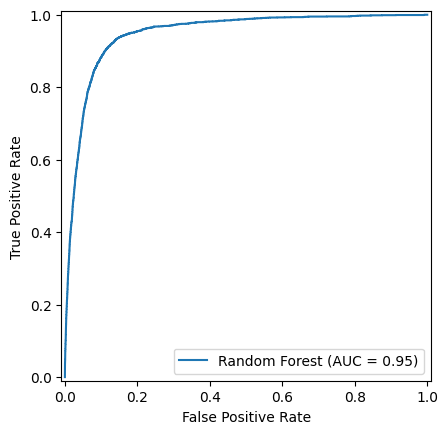

In [36]:
plot_roc_curve(rf, X_test, y_test)


#### 2.2 Challenger Model -- LightGBM Classifier

##### Why LightGBM?
- Fast and highly scalable

- Handles categorical features natively (or with encoding)

- Handles imbalanced classification

In [46]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import roc_auc_score

In [47]:
# --- Prepare Dataset ---
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# --- Define Parameters ---
params = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': True,
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': 8,
    'verbose': -1,
    'feature_pre_filter': False,
    'random_state': 42
}

In [48]:
# --- Train the Model ---
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[valid_data],
    num_boost_round=1000,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)
    ]
)


Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.951081
Early stopping, best iteration is:
[142]	valid_0's auc: 0.951347


In [49]:
# --- Predict & Evaluate ---
y_pred_proba = lgb_model.predict(X_test)
y_pred_class = (y_pred_proba >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")


Confusion Matrix:
[[15399  2014]
 [  233  2354]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     17413
           1       0.54      0.91      0.68      2587

    accuracy                           0.89     20000
   macro avg       0.76      0.90      0.80     20000
weighted avg       0.93      0.89      0.90     20000


ROC AUC Score: 0.9513


#### 2.3 Model comparison

In [54]:
def compare_roc_curves(model1, model2, X_test, y_test, labels=("Random Forest", "LightGBM")):
    # Predict probabilities
    rf_probs = model1.predict_proba(X_test)[:, 1]
    lgb_probs = model2.predict(X_test)

    # Compute FPR, TPR
    rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
    lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_probs)

    # AUC
    rf_auc = auc(rf_fpr, rf_tpr)
    lgb_auc = auc(lgb_fpr, lgb_tpr)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(rf_fpr, rf_tpr, label=f"{labels[0]} (AUC = {rf_auc:.3f})")
    plt.plot(lgb_fpr, lgb_tpr, label=f"{labels[1]} (AUC = {lgb_auc:.3f})", linestyle="--")

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves: Model Comparison')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


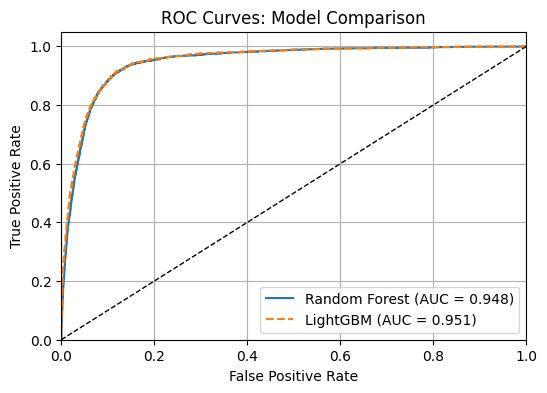

In [55]:
compare_roc_curves(rf, lgb_model, X_test, y_test)

#### Model Comparison Summary: Random Forest vs LightGBM

We built and evaluated two supervised classification models to detect loan default or fraud cases:

##### Model Choices

- **Baseline:** `RandomForestClassifier`
- **Challenger:** `LightGBMClassifier`


---

##### Preprocessing Pipeline

- **Numeric Features:**
  - Filled missing values with `median` (e.g., DTI, utilization, FICO ranges)
- **Categorical Features:**
  - Used `LabelEncoder` for Random Forest
  - Same encoded features passed to LightGBM (no native categorical encoding used in this test)
- **Binary Flags:** Encoded as `0/1`
- **Date Fields:** Extracted key components where relevant (e.g., `term_months`, `emp_length_num`)

---

##### Performance Metrics

| Metric            | Random Forest | LightGBM     |
|-------------------|---------------|--------------|
| Precision (Class 1) | 0.57         | 0.54         |
| Recall (Class 1)    | 0.88         | **0.91** ✅   |
| F1-Score (Class 1)  | 0.69         | 0.68         |
| ROC AUC             | 0.948        | **0.951** ✅  |
| Accuracy            | 90%          | 89%          |

- **LightGBM improved recall and AUC**, which is critical for catching more fraud cases.
- **Slight drop in precision** is acceptable depending on business risk tolerance.
- **Both models perform similarly**, but LightGBM is more flexible for future tuning and threshold adjustment.

---

##### Recommendation

LightGBM is the preferred model due to:
- Higher **true positive detection** (recall)
- Better **overall class separation** (AUC)
- More efficient training and tuning capabilities



#### 2.4 Model Tunning

In [56]:
from sklearn.metrics import precision_recall_fscore_support

def plot_threshold_sensitivity(y_true, y_probs):
    thresholds = np.linspace(0.1, 0.9, 50)
    precisions, recalls, f1s = [], [], []

    for t in thresholds:
        y_pred = (y_probs >= t).astype(int)
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    plt.figure(figsize=(6, 4))
    plt.plot(thresholds, precisions, label='Precision')
    plt.plot(thresholds, recalls, label='Recall')
    plt.plot(thresholds, f1s, label='F1 Score')
    plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold')
    plt.title("🔍 Threshold Sensitivity - LightGBM")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


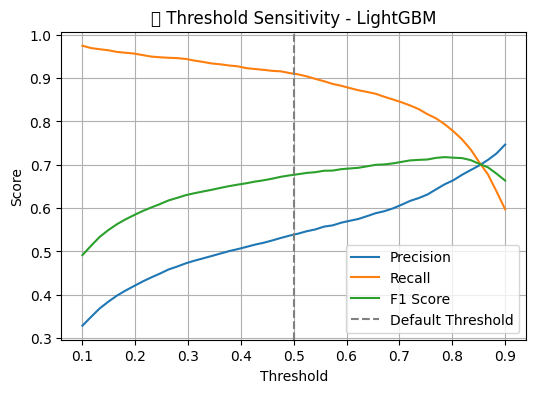

In [57]:
plot_threshold_sensitivity(y_test, y_pred_proba)

From the graph:

- Recall is highest at lower thresholds (expected), but drops steadily beyond 0.5.

- Precision improves as threshold increases (more selective).

- F1-score peaks around threshold = ~0.60–0.70 — a good balance point.

> Optimal Threshold ≈ 0.65 (average): Maximizes F1, balancing catching fraud and avoiding false positives.

In [58]:
# Apply optimized Threshold to LightGBM
optimal_threshold = 0.65
y_pred_opt = (y_pred_proba >= optimal_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_opt))
print(classification_report(y_test, y_pred_opt))

[[15834  1579]
 [  349  2238]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     17413
           1       0.59      0.87      0.70      2587

    accuracy                           0.90     20000
   macro avg       0.78      0.89      0.82     20000
weighted avg       0.93      0.90      0.91     20000



In [59]:
def compare_multiple_roc(models_dict, y_test, proba_dict):
    plt.figure(figsize=(6, 4))

    for label, y_probs in proba_dict.items():
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.title("ROC Curve Comparison: RF vs LGBM vs Optimized")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

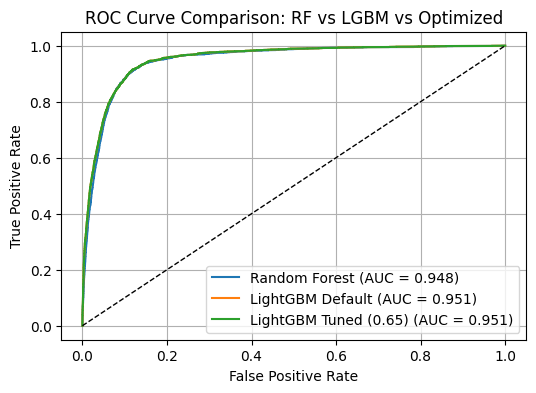

In [60]:
compare_multiple_roc(
    models_dict={"Random Forest": rf, "LightGBM": lgb_model},
    y_test=y_test,
    proba_dict={
        "Random Forest": rf.predict_proba(X_test)[:, 1],
        "LightGBM Default": y_pred_proba,
        "LightGBM Tuned (0.65)": y_pred_proba  # same probs, different threshold
    }
)


In [61]:
import shap

# Init TreeExplainer
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


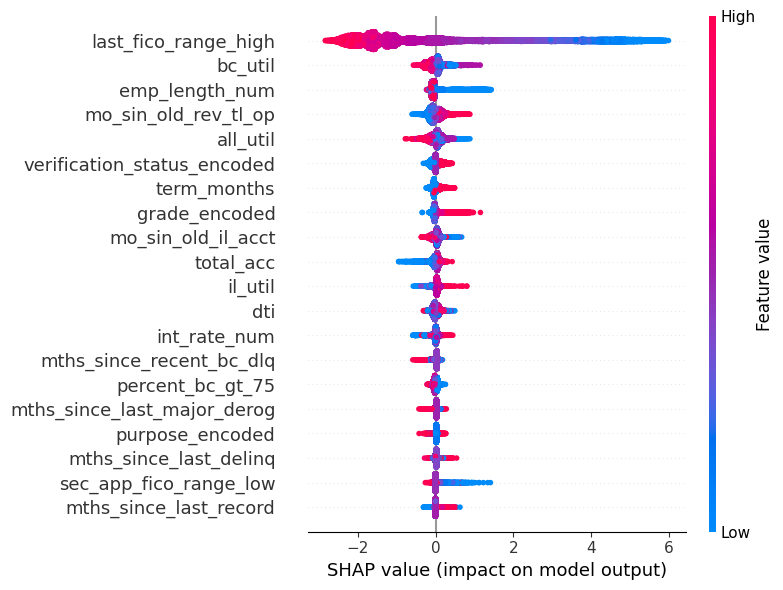

In [62]:
# SHAP summary plot
shap.summary_plot(shap_values, X_test, show=False, plot_size=[8,6])

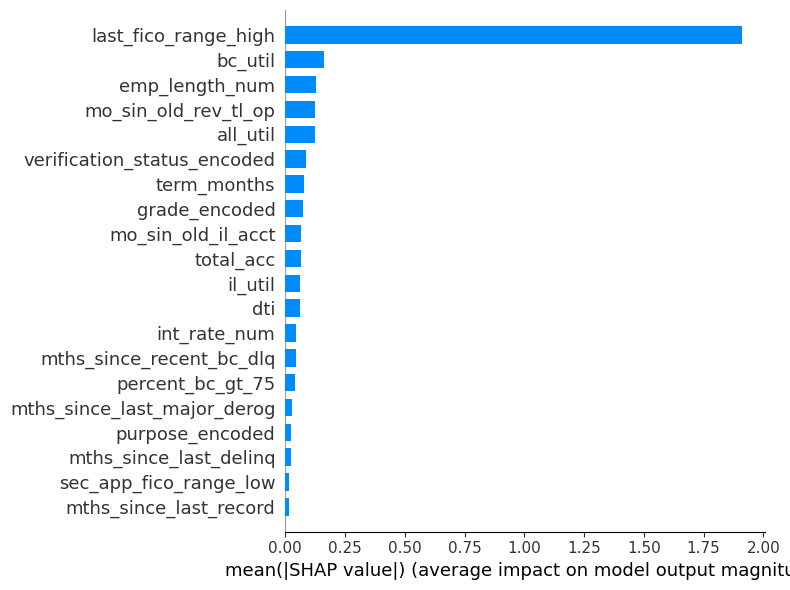

In [63]:
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False, plot_size=[8,6])

##### Key insights

1. `last_fico_range_high` is dominant, meaning it has the strongest influence on the prediction.
-  This makes sense — a lower FICO range often signals higher default/fraud risk.

<br>

2. Features like:

- `bc_util` (credit card usage)

- `emp_length_num` (job stability)

- `mo_sin_old_rev_tl_op` (revolving credit age)

- `all_util`, `term_months`, and `verification_status_encoded`

 All carry moderate predictive power.

<br>

3. The long tail (bottom features) contributes minimally, suggesting potential for feature reduction or simplified models.

### 2.5 Exporting the pipeline and model

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder, MinMaxScaler

import os
import joblib

In [92]:
numeric_features = [
    'dti', 'dti_joint', 'il_util', 'all_util', 'bc_util', 'total_acc',
    'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
    'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog',
    'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq',
    'percent_bc_gt_75', 'last_fico_range_high', 'last_fico_range_low',
    'sec_app_fico_range_low', 'sec_app_fico_range_high'
]

categorical_features = [
    'home_ownership', 'purpose', 'grade',
    'verification_status', 'application_type'
]

text_features = ['emp_title']  # transformed to emp_title_clean
term_feature = ['term']
int_rate_feature = ['int_rate']
emp_length_feature = ['emp_length']

binary_flags = ['hardship_flag', 'debt_settlement_flag', 'pymnt_plan']


In [93]:
MODEL_DIR = '/content/drive/MyDrive/DSIF-course-material/models'
os.makedirs(MODEL_DIR, exist_ok=True)

In [ ]:
# Preprocessing for RF (LabelEncoded categories already processed manually)
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=12,
        class_weight='balanced',
        random_state=42
    ))
])

# Fit and save the pipeline
rf_pipeline.fit(X_train, y_train)
rf_path = os.path.join(MODEL_DIR, 'rf_pipeline.pkl')

joblib.dump(rf_pipeline, rf_path)

In [95]:
# ---- 1. Custom transformers for specific fields ----
def parse_emp_length(X):
    def transform(x):
        if pd.isnull(x):
            return -1
        if '<' in x:
            return 0
        if '+' in x:
            return 10
        try:
            return int(x.strip().split()[0])
        except:
            return -1
    return np.array([transform(v) for v in X.ravel()]).reshape(-1, 1)

def parse_int_rate(X):
    return X.str.replace('%', '').astype(float).to_numpy().reshape(-1, 1) / 100

def extract_term_months(X):
    return X.str.extract(r'(\d+)').astype(float).to_numpy()

def simplify_emp_title(X):
    top_n = pd.Series(X.ravel()).value_counts().nlargest(20).index
    return np.where(np.isin(X, top_n), X, 'Other').reshape(-1, 1)

def binarize_flags(X):
    return np.where(X == 'y', 1, 0).reshape(-1, 1)

# ---- 2. ColumnTransformer for preprocessing ----
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ]), numeric_features),

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ]), categorical_features),

    ('emp_title', Pipeline([
        ('simplify', FunctionTransformer(simplify_emp_title, validate=False)),
        ('encode', OrdinalEncoder())
    ]), ['emp_title']),

    ('term_months', Pipeline([
        ('extract', FunctionTransformer(extract_term_months, validate=False))
    ]), ['term']),

    ('int_rate_num', Pipeline([
        ('parse', FunctionTransformer(parse_int_rate, validate=False))
    ]), ['int_rate']),

    ('emp_length_num', Pipeline([
        ('parse', FunctionTransformer(parse_emp_length, validate=False))
    ]), ['emp_length']),

    ('binary_flags', Pipeline([
        ('encode', FunctionTransformer(binarize_flags, validate=False))
    ]), binary_flags)
])

In [103]:
# Full RF pipeline
rf_pipeline_full = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=12,
        class_weight='balanced',
        random_state=42
    ))
])

# Fit and save the pipeline
rf_path = os.path.join(MODEL_DIR, 'rf_pipeline_full.pkl')
joblib.dump(rf_pipeline, rf_path)

['/content/drive/MyDrive/DSIF-course-material/models/rf_pipeline_full.pkl']

In [101]:
from sklearn.base import BaseEstimator, ClassifierMixin

# Custom wrapper to apply threshold on top of probabilities
class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        probs = self.model.predict_proba(X)[:, 1]
        return (probs >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

In [ ]:
# Final LGB pipeline
lgb_pipeline_full = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', ThresholdClassifier(model=lgb_model, threshold=0.65))
])

# Save LGBM model
lgb_path = os.path.join(MODEL_DIR, 'lgb_pipeline_full.pkl')
lgb_model_path = os.path.join(MODEL_DIR, 'lgb_model.pkl')
threshold_path = os.path.join(MODEL_DIR, 'lgb_threshold.pkl')

joblib.dump(lgb_model, lgb_model_path)
joblib.dump(optimal_threshold, threshold_path)
joblib.dump(optimal_threshold, lgb_path) # Full pipeline
